# 1. Essentials

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import RandomOverSampler

import warnings

warnings.filterwarnings('ignore')

In [2]:
with open(r"C:\Users\aredd\csvfiles\churn.csv") as file:
    df = pd.read_csv(file)

In [3]:
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# Information about the Data

    'churn' : 'whether the person stopped using the services',
    'accountlength' : 'number of days that this account has been active',
    'numbervmailmessages' : 'number of video mail messages',
    'totaldayminutes' : 'minutes spent of 1440 minutes(1day(1Hr(60Min(24*60=1440))))',
    'totaleveminutes' : 'total number calls during evenings'


In [49]:
# df.info()

In [6]:
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df['churn'] = pd.get_dummies(df['churn'])['Yes']

In [50]:
# converting Categorical Text data into Numerical

In [8]:
df['internationalplan'] = pd.get_dummies(df['internationalplan'])['yes']
df['voicemailplan'] = pd.get_dummies(df['voicemailplan'])['yes']
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


# 2.1 Feature Selction 
 using Pearson correlation

<AxesSubplot:>

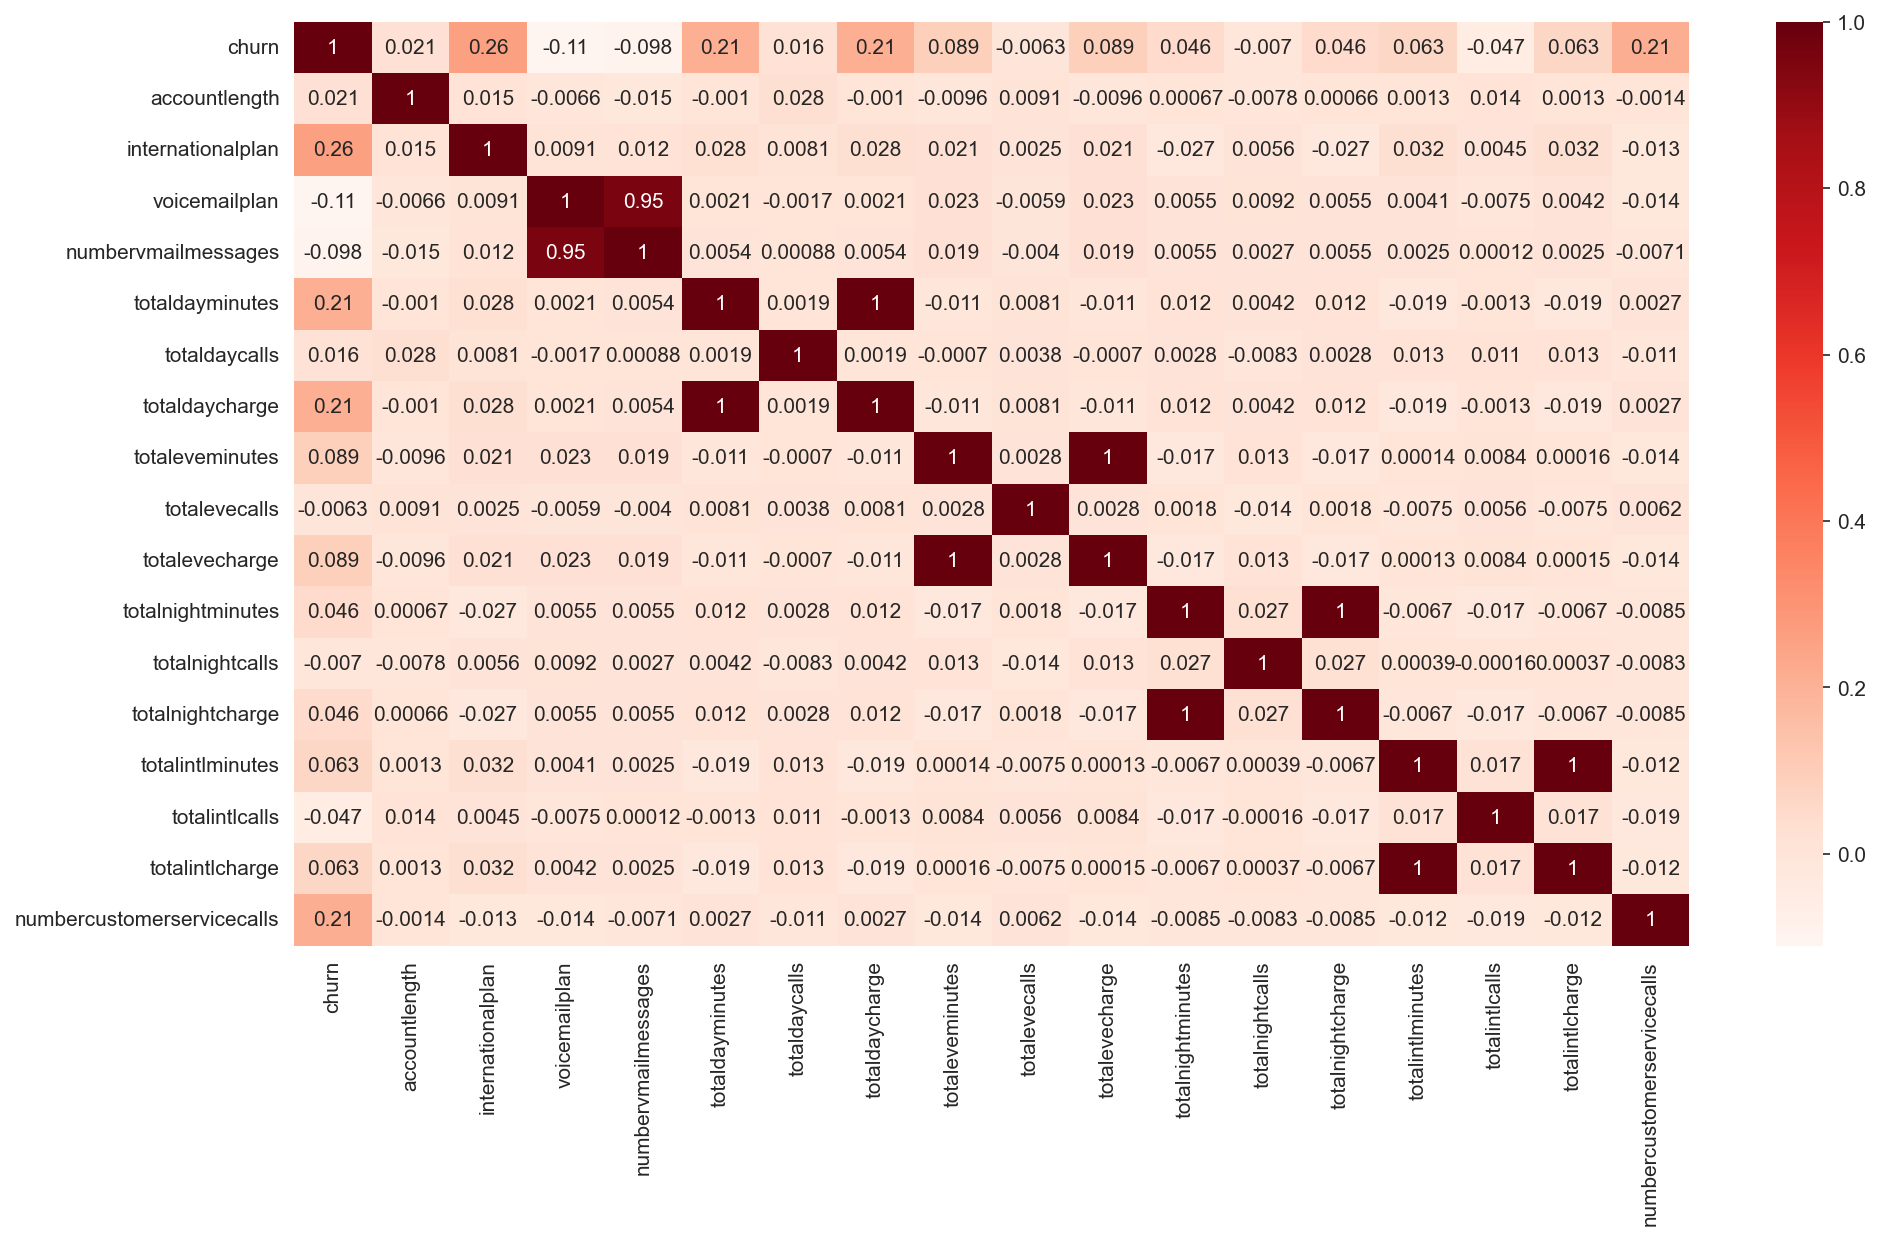

In [9]:
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(15,8)
fig.set_dpi(150)
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [10]:
correlation_pearson = df.corr()

In [11]:
correlation_pearson = correlation_pearson > 0.8

In [51]:
# correlation_pearson

In [13]:
# as we know charge is directly proportional to the calling time, so we drop drop any one of them
# in these case we are dropping calls

drop_cols = ['totaldayminutes', 'numbervmailmessages','totaleveminutes', 'totalnightminutes','totalintlminutes']


In [14]:
df = df.drop(drop_cols,axis=1)

In [15]:
col_names = df.columns

##### After removing correlated features

<AxesSubplot:>

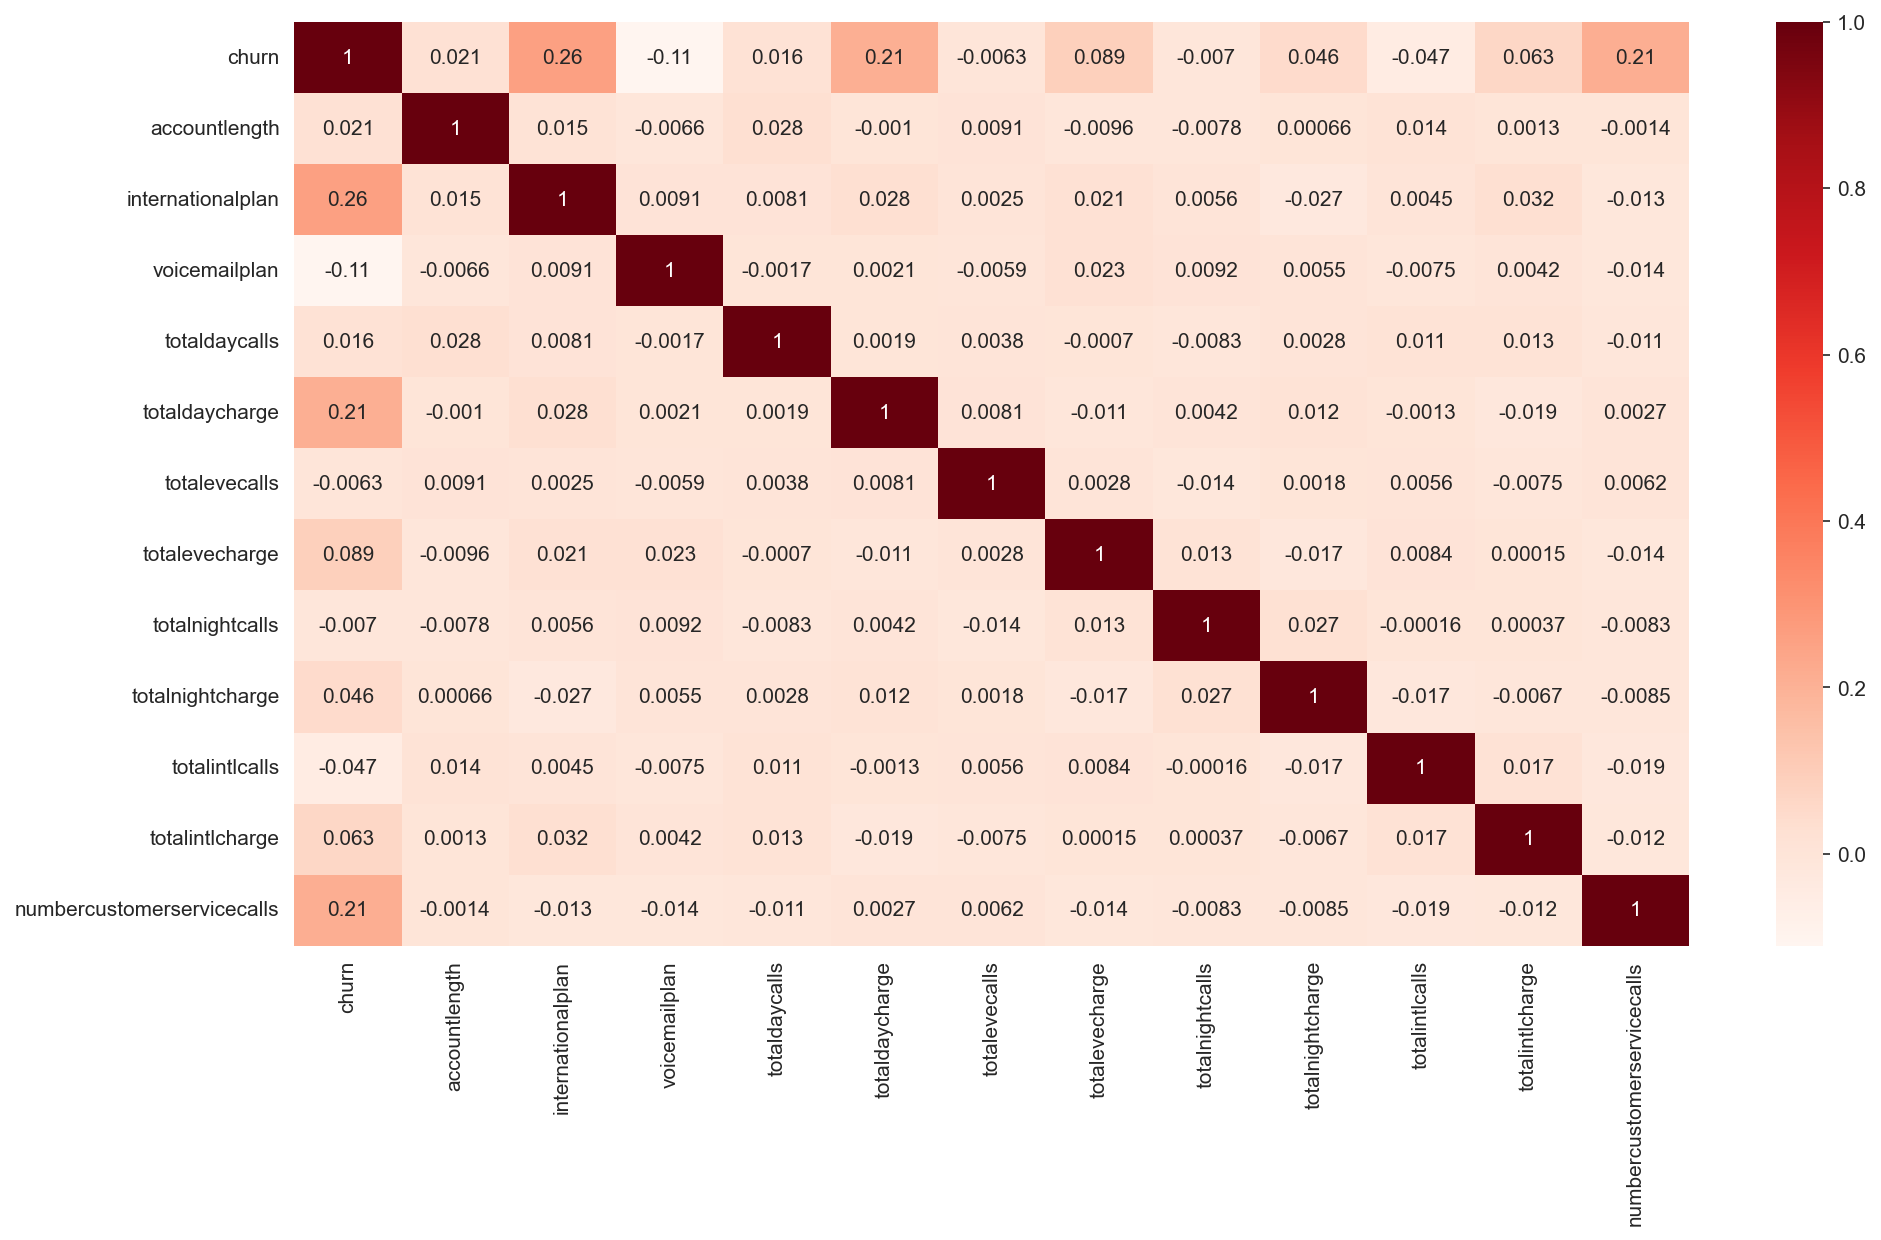

In [16]:
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_size_inches(15,8)
fig.set_dpi(150)
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [17]:
df.shape

(5000, 13)

In [18]:
col_names = col_names.drop('churn')

In [19]:
iterator = iter(col_names)

# 3.1 EDA on Distributions

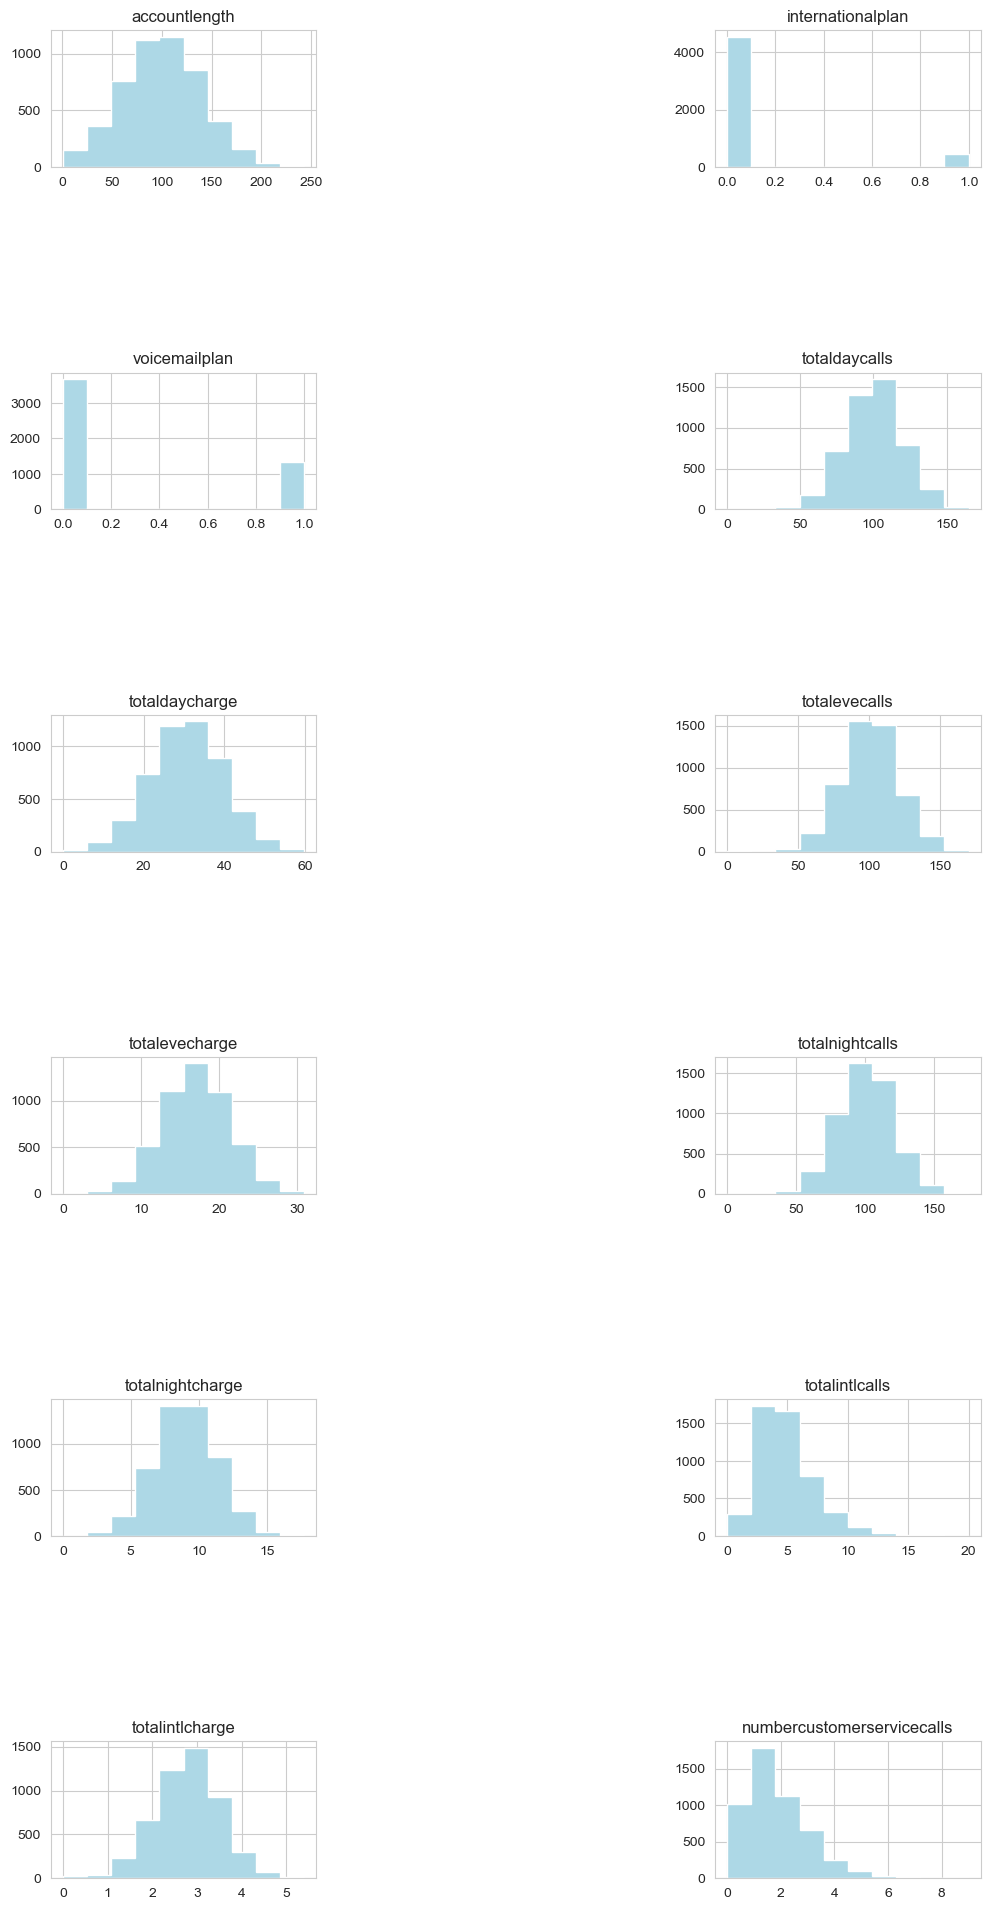

In [20]:
# 4 * 3
iterator_1 = iter(col_names)
fig, axs = plt.subplots(nrows=6,ncols=2,gridspec_kw={'wspace':1.5,'hspace':1.5},figsize=(12,24))
for i in range(6):
    for j in range(2):
        axs[i,j].hist(df[next(iterator)],histtype='stepfilled',color='lightblue')
        axs[i,j].title.set_text(next(iterator_1))

In [21]:
all_means = df.describe().loc['mean']
all_means = all_means.drop('churn')

# 3.2 EDA on varience among all the averages

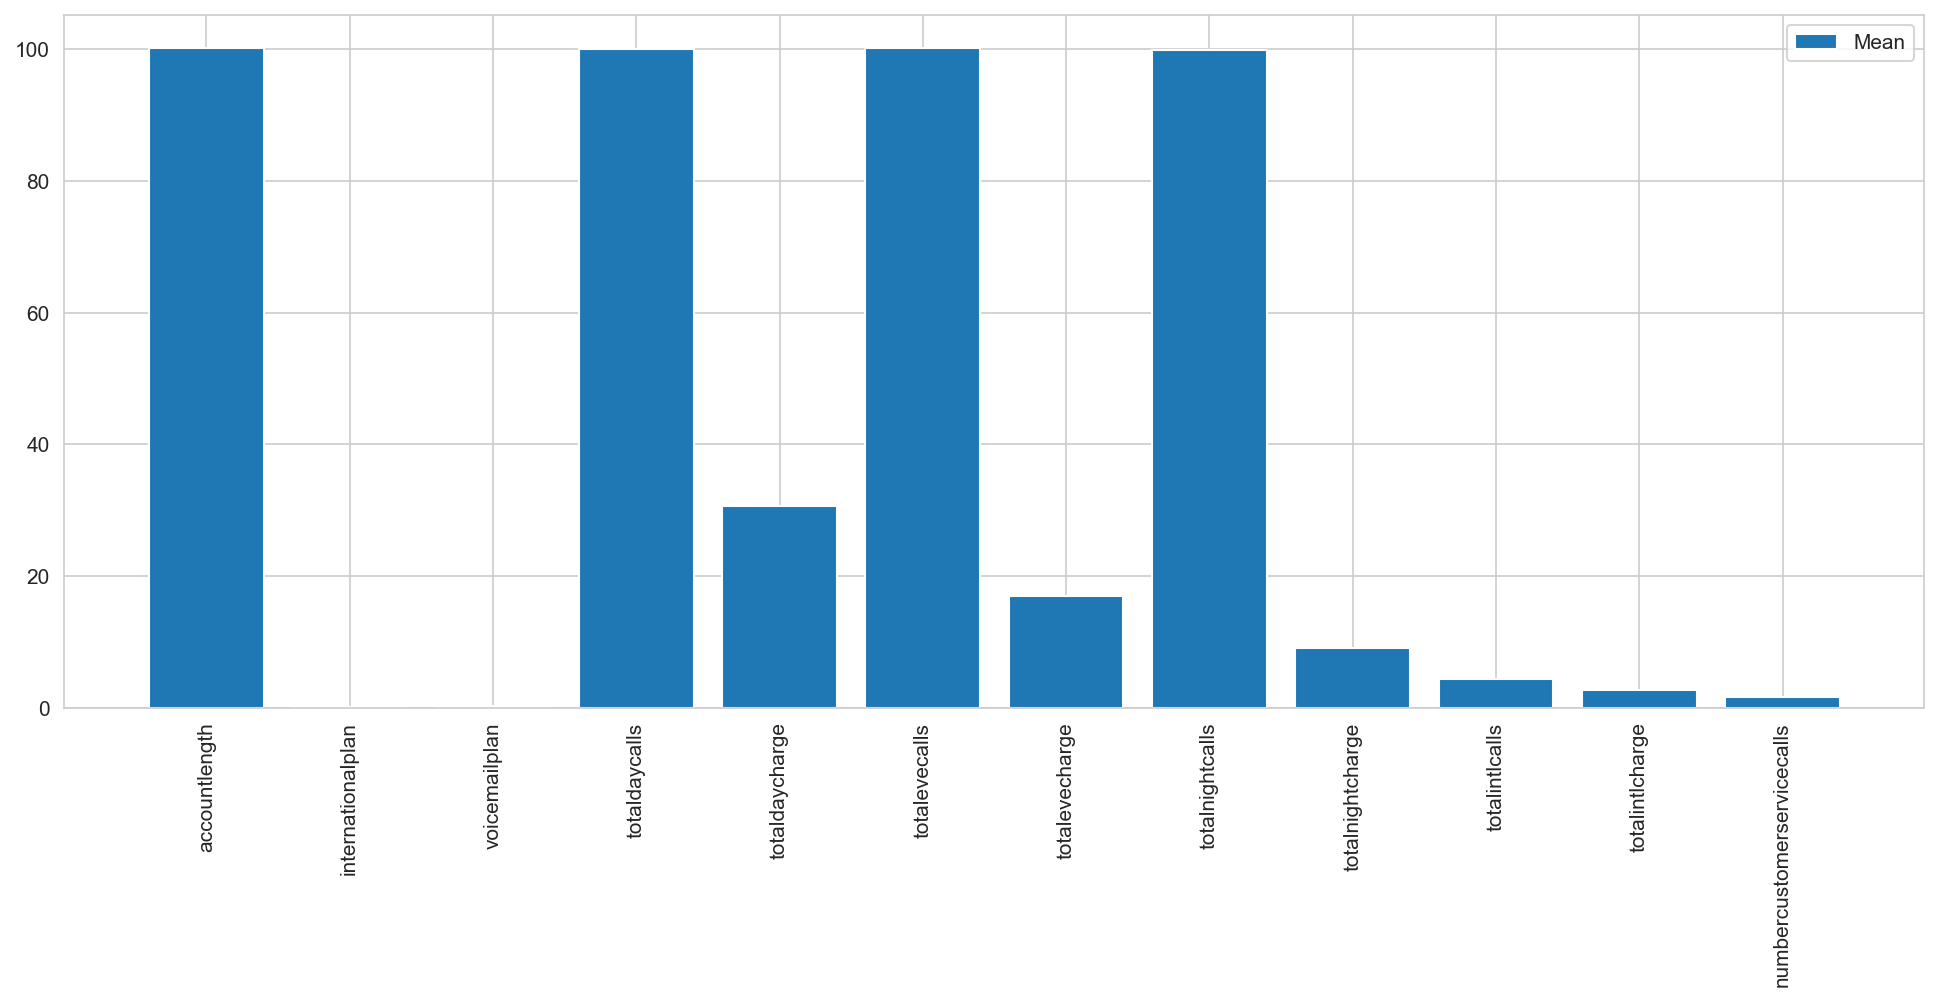

In [22]:
fig = plt.gcf()
fig.set_size_inches(16,6)
fig.set_dpi(150)

plt.bar([x for x in range(1,13)],all_means,label='Mean')
plt.xticks([x for x in range(1,13)],col_names,rotation=90)
plt.legend()

# 3.3 Normalizing data with m=0 and sd =1

In [23]:
# splitting X(Independent) and ys(Dependent)
X = df.drop('churn',axis = 1)
y = df['churn']

#  fitting scaler
X = StandardScaler().fit_transform(X)

In [24]:
# after scaling, means of all cols
all_means_aft_sc = pd.DataFrame(X).describe().loc['mean']

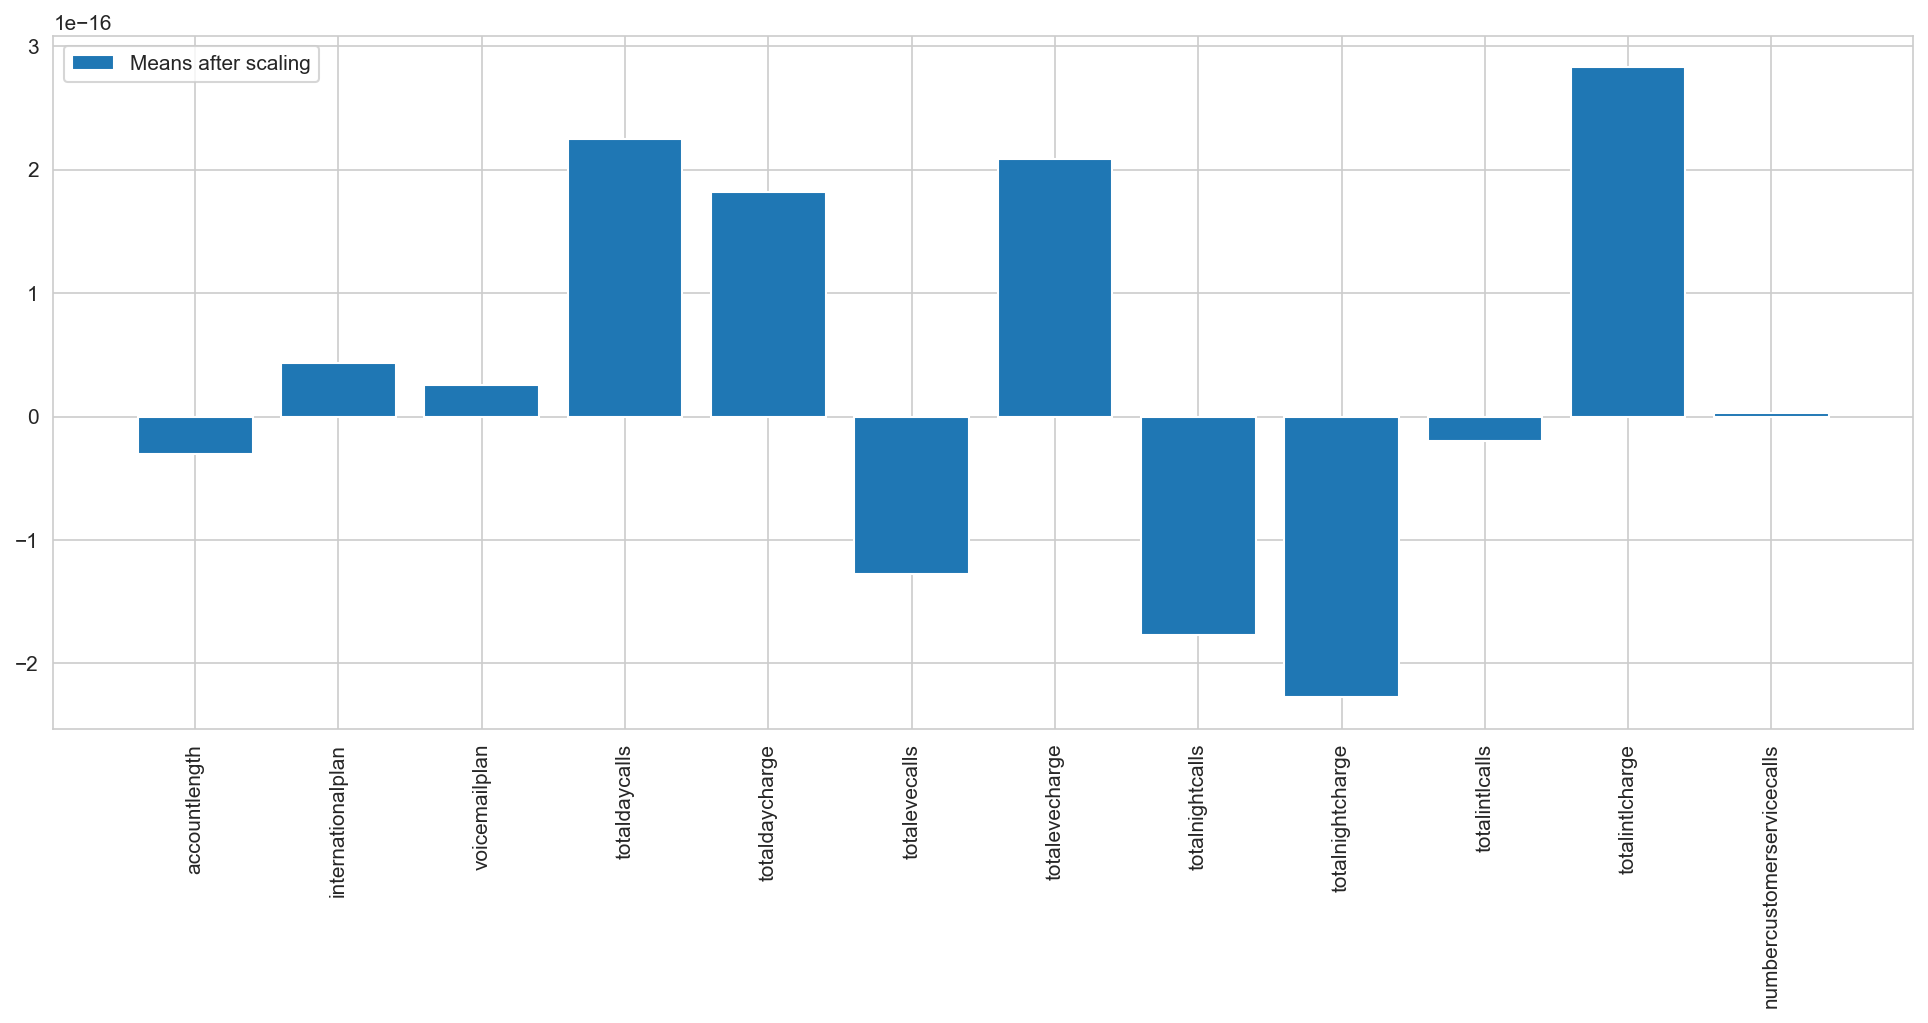

In [25]:
fig = plt.gcf()
fig.set_size_inches(16,6)
fig.set_dpi(150)

plt.bar([x for x in range(1,13)],all_means_aft_sc,label='Means after scaling')
plt.xticks([x for x in range(1,13)],col_names,rotation=90)
plt.legend()

In [26]:
tmp_data = pd.DataFrame(X)

In [27]:
itrr = iter(tmp_data.columns)
iterator = iter(col_names)

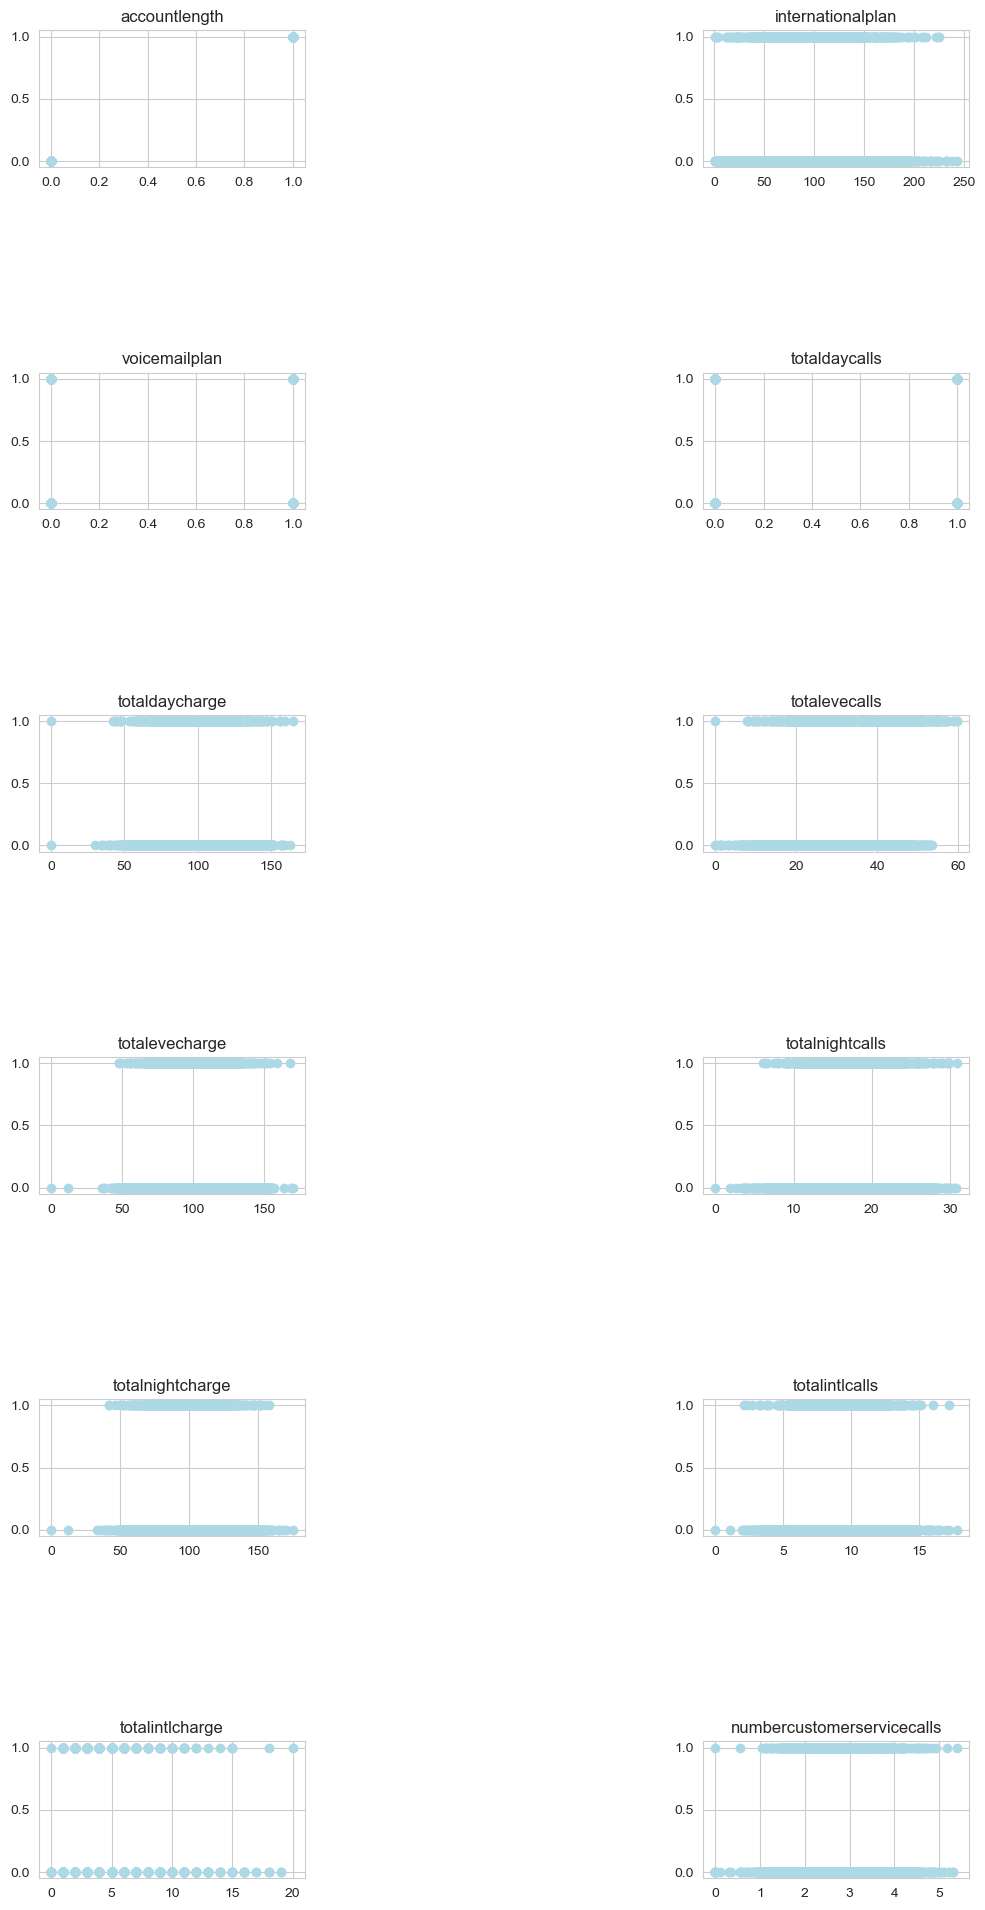

In [28]:
fig, axs = plt.subplots(nrows=6,ncols=2,gridspec_kw={'wspace':1.5,'hspace':1.5},figsize=(12,24))
for i in range(6):
    for j in range(2):
        axs[i,j].scatter(df.iloc[:,next(itrr)], y ,color='lightblue')
        axs[i,j].title.set_text(next(iterator))

In [29]:
from collections import Counter

ct = Counter(y)

In [30]:
pd.DataFrame(ct.items(),index = None)

,0,1
0,0,4293
1,1,707


# 4.1 imbalnced Data

In [31]:
# lets first try using ensembling technnique(RandomForest) to see whether our model will be biased / not

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1042)

# 4.2 using Ensembleming Technique to handle Imbalanced Data

In [32]:
kfold = StratifiedKFold(n_splits=10)
folds = kfold.split(X_train,y_train)

model = RandomForestClassifier()

In [33]:
scores = []

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

for k,(train,test) in enumerate(folds):
    model.fit(X_train.iloc[train,:],y_train.iloc[train,:])
    score = model.score(X_train.iloc[test,:],y_train.iloc[test,:])
    scores.append(score)
    

In [34]:
[print(f"Scores: {x} ") for x in scores]

Scores: 0.9542857142857143 
Scores: 0.9428571428571428 
Scores: 0.9514285714285714 
Scores: 0.9628571428571429 
Scores: 0.94 
Scores: 0.9628571428571429 
Scores: 0.9485714285714286 
Scores: 0.9371428571428572 
Scores: 0.9457142857142857 
Scores: 0.9542857142857143 


[None, None, None, None, None, None, None, None, None, None]

In [35]:
pred = model.predict(X_test)

In [36]:
accuracy_score(y_test,pred)

0.948

###### with imbalanced data using Randomforest classifier

In [37]:
np.mean(scores)

0.95

# 4.3 lets now resample the data to handle imbalanced problem

In [38]:
samp = RandomOverSampler()

In [39]:
X, y = samp.fit_resample(X,y)

In [40]:
Counter(y)

Counter({0: 4293, 1: 4293})

In [41]:


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1042)

model_2 = RandomForestClassifier()

In [42]:
from xgboost import XGBClassifier

model_2 = XGBClassifier()

In [43]:
model_2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
model_2.score(X_train,y_train)

1.0

In [45]:
pred_2 = model_2.predict(X_test)

In [46]:
accuracy_score(y_test,pred_2)

0.9902950310559007

# Conclusion:

Overall we managed to get an accuracy around 99%